In [3]:
import pandas as pd

df = pd.read_csv("user_reviews.csv")
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [4]:
#to check for null values
print(df.isnull().sum())

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


In [7]:
#drop null values
df = df.dropna()
print(df.isnull().sum())

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [9]:
df.count()

App                       37427
Translated_Review         37427
Sentiment                 37427
Sentiment_Polarity        37427
Sentiment_Subjectivity    37427
dtype: int64

In [24]:
#add three new columns in the dataset by understanding the sentiments of each customer review as Positive, Negative, and Neutral:
import nltk
from itertools import count
from nltk.util import pr
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Translated_Review"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Translated_Review"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Translated_Review"]]
print(df.head(10))

                      App                                  Translated_Review  \
0   10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1   10 Best Foods for You    This help eating healthy exercise regular basis   
3   10 Best Foods for You         Works great especially going grocery store   
4   10 Best Foods for You                                       Best idea us   
5   10 Best Foods for You                                           Best way   
6   10 Best Foods for You                                            Amazing   
8   10 Best Foods for You                               Looking forward app,   
9   10 Best Foods for You              It helpful site ! It help foods get !   
10  10 Best Foods for You                                          good you.   
11  10 Best Foods for You  Useful information The amount spelling errors ...   

   Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  Positive  Negative  \
0   Positive                1.00       

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


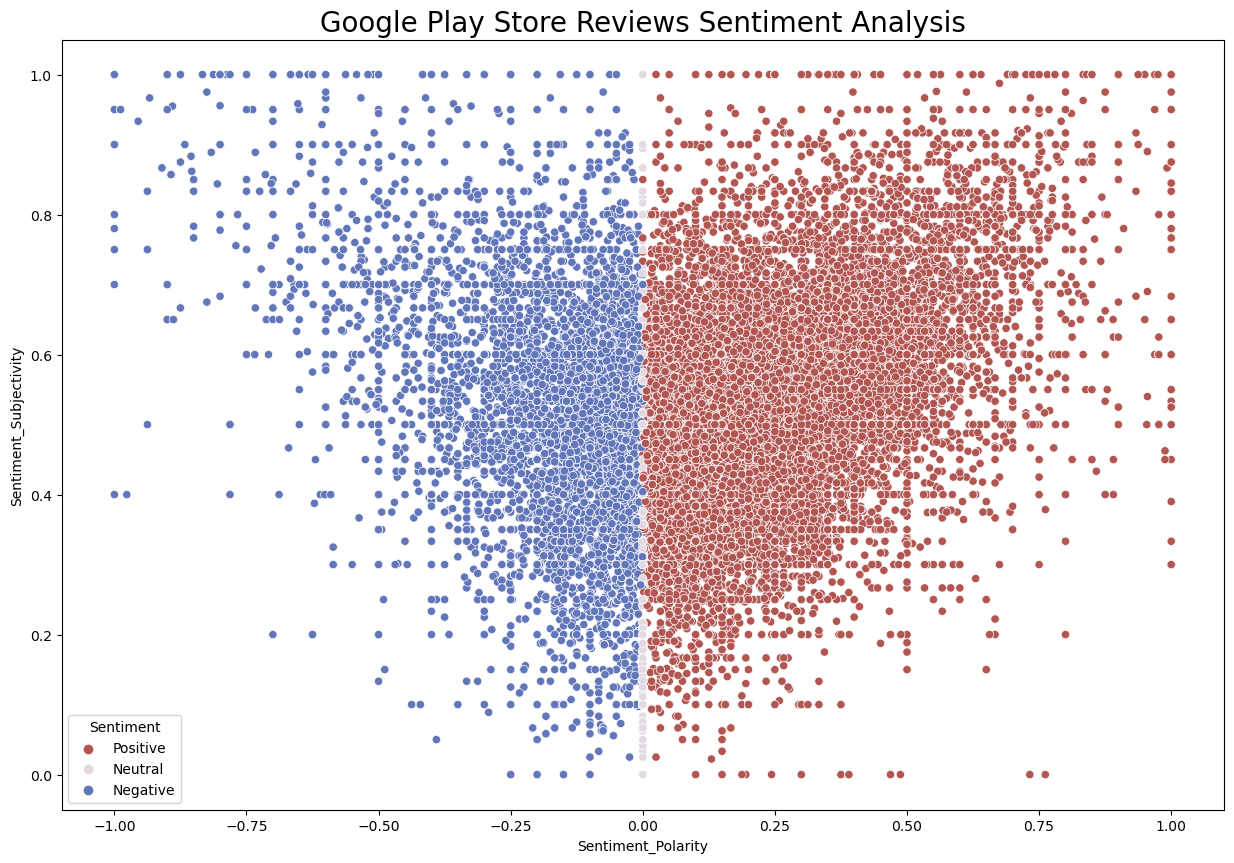

In [26]:
#sentiment analysis seen via scatterplot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.scatterplot(df['Sentiment_Polarity'], df['Sentiment_Subjectivity'], 
                hue = df['Sentiment'], edgecolor='white', palette="twilight_shifted_r")
plt.title("Google Play Store Reviews Sentiment Analysis", fontsize=20)
plt.show()